In [100]:
import pandas
import plotly
import plotly.subplots
import plotly.express

df = pandas.read_csv('../test_n_elements_LeNet5.csv')

# layers = ['c1', 'relu1', 's2', 'c3', 'relu3', 's4', 'c5', 'relu5', 'f6', 'relu6', 'f7', 'sig7']
# layers = ['conv0', 'act0',
#           'pool1',
#           'conv2', 'act2',
#           'pool3',
#           'conv4', 'act4',
#           'conv5', 'act5',
#           'pool6',
#           'conv7', 'act7',
#           'conv8', 'act8',
#           'pool9',
#           'conv10', 'act10',
#           'conv11', 'act11',
#           'pool12',
#           'classifier_dropout0', 'classifier_fc0', 'classifier_act0',
#           'classifier_dropout1', 'classifier_fc1', 'classifier_act1',
#           'classifier_fc2']
layer = 'c1'

#df[(df['layer'] == 'c1') & (df['coverage'] == 0.001)]

#fig = plotly.subplots.make_subplots(rows=1, cols=2)

#fig.add_scatter(x=df[(df['layer'] == 'c1') & (df['coverage'] == 0.001)]['n_bit_flips'], y=df[(df['layer'] == 'c1') & (df['coverage'] == 0.001)]['loss'], row=1, col=1)

#fig.add_scatter(x=df[(df['layer'] == 'c1') & (df['coverage'] == 0.002)]['n_bit_flips'], y=df[(df['layer'] == 'c1') & (df['coverage'] == 0.002)]['loss'], row=1, col=1)

#fig.add_scatter(x=df[(df['layer'] == 'c1') & (df['coverage'] == 0.001)]['n_bit_flips'], y=df[(df['layer'] == 'c1') & (df['coverage'] == 0.001)]['loss'], row=1, col=2)


colors = plotly.colors.n_colors(plotly.express.colors.sequential.amp[0], plotly.express.colors.sequential.amp[-1], len(set(df['n_bit_flips'])), colortype='rgb')
fig = plotly.express.line(df[df['layer'] == layer], color='n_bit_flips', x="coverage", y="accuracy", title='', template='plotly_white', color_discrete_sequence=colors)
#colors = plotly.colors.n_colors(plotly.express.colors.sequential.amp[0], plotly.express.colors.sequential.amp[-1], len(set(df['coverage'])), colortype='rgb')
#fig = plotly.express.line(df[df['layer'] == layer], color='coverage', x="n_bit_flips", y="accuracy", title='', template='plotly_white', color_discrete_sequence=colors)
fig.update_layout(xaxis=dict(showgrid=False, zeroline=False,showline=True, linewidth=2, linecolor='black', mirror=True), yaxis=dict(showgrid=False, zeroline=False,showline=True, linewidth=2, linecolor='black', mirror=True), margin={'l': 10, 'r': 10, 't': 10, 'b': 10})
fig.update_layout(showlegend=False)
fig.show()

:HeatMap   [columns,index]   (value)
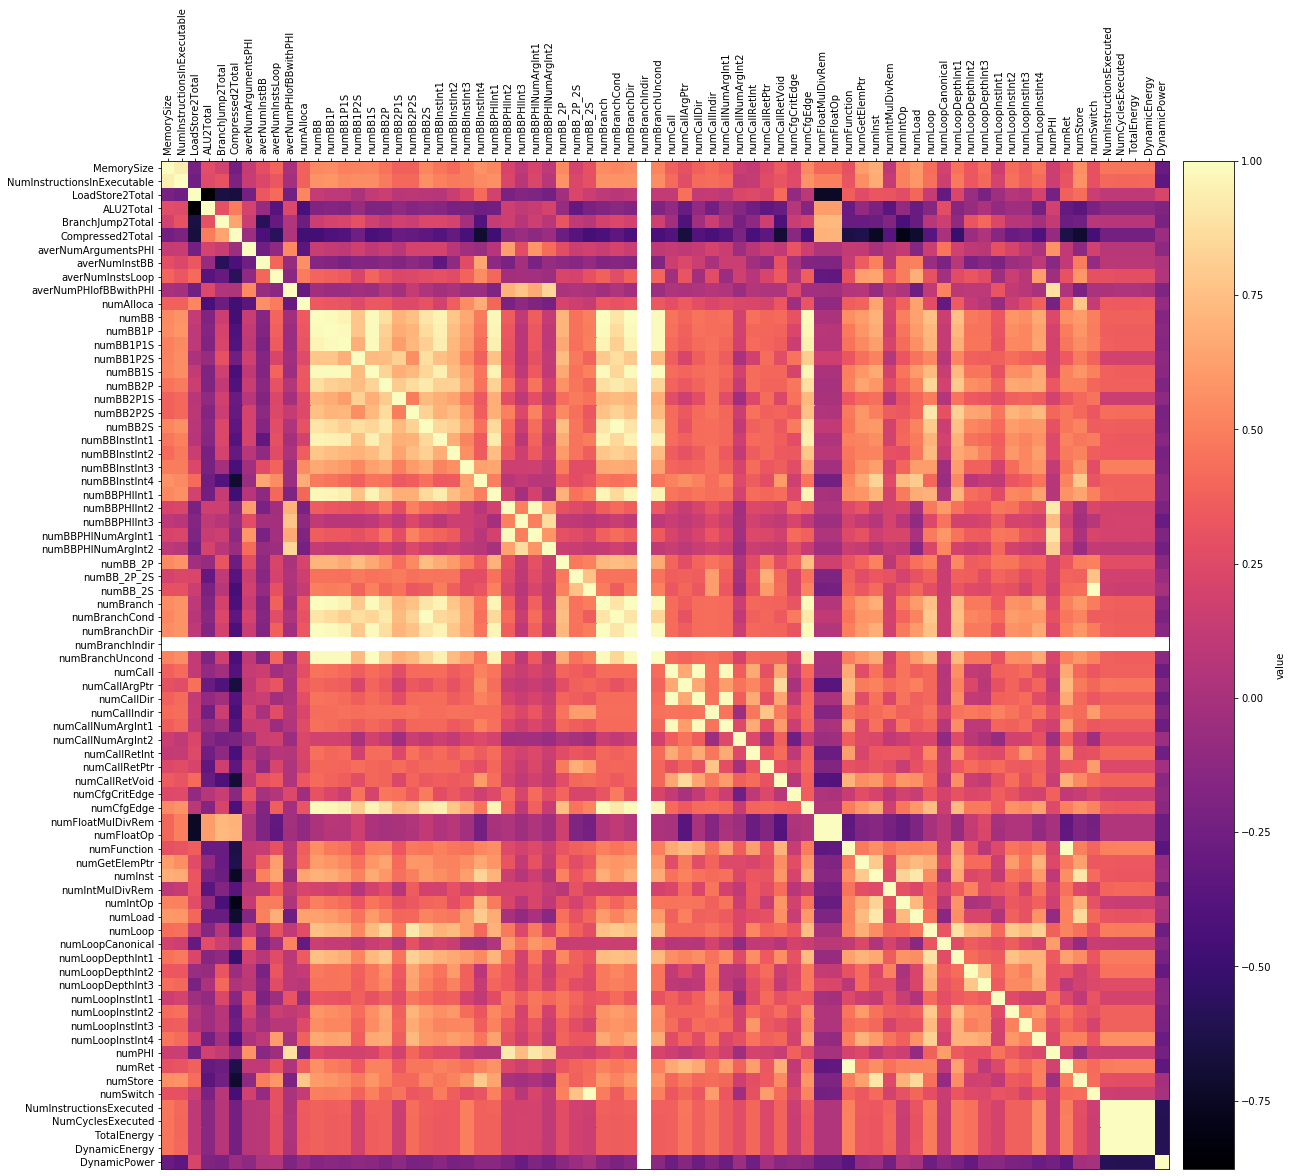

In [38]:
# hvplot tests
import pandas
import hvplot.pandas
import holoviews
import holoviews.plotting.util

df = pandas.read_csv('/mnt/DATA/Documenti/PhDMainLocalFolder/COGUTS/SoC_COGUTS_simulate_powereval/power_model/dataset/2perm_full.csv', index_col=[0, 1, 2, 3], header=[0, 1]).xs('features', drop_level=False, axis=0).T.astype('float64')

df.columns = [x[-1] for x in df.columns]

df = df.corr(method='spearman')

# df.reindex()

plot = df.hvplot.heatmap(
        flip_yaxis=True,
        #title='Spearman Correlation',
        colorbar=True,
        xaxis='top', 
        rot=90,
        # plot dimension in pixels
        #width=1500, height=1500,
        fontscale=1,
    ).opts(
        # show values is to enable/disable annotations
        show_values=False,
        # to have space between lines
        toolbar='disable',
        # to change figure size for Matplotlib
        fig_size=500,
        #fontsize={'title': 18, 'xticks': 8, 'yticks': 8},
        cmap=holoviews.plotting.util.process_cmap('Magma')
    )
plot
#holoviews.save(plot, 'test.pdf')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:HeatMap   [x,y]   (z)
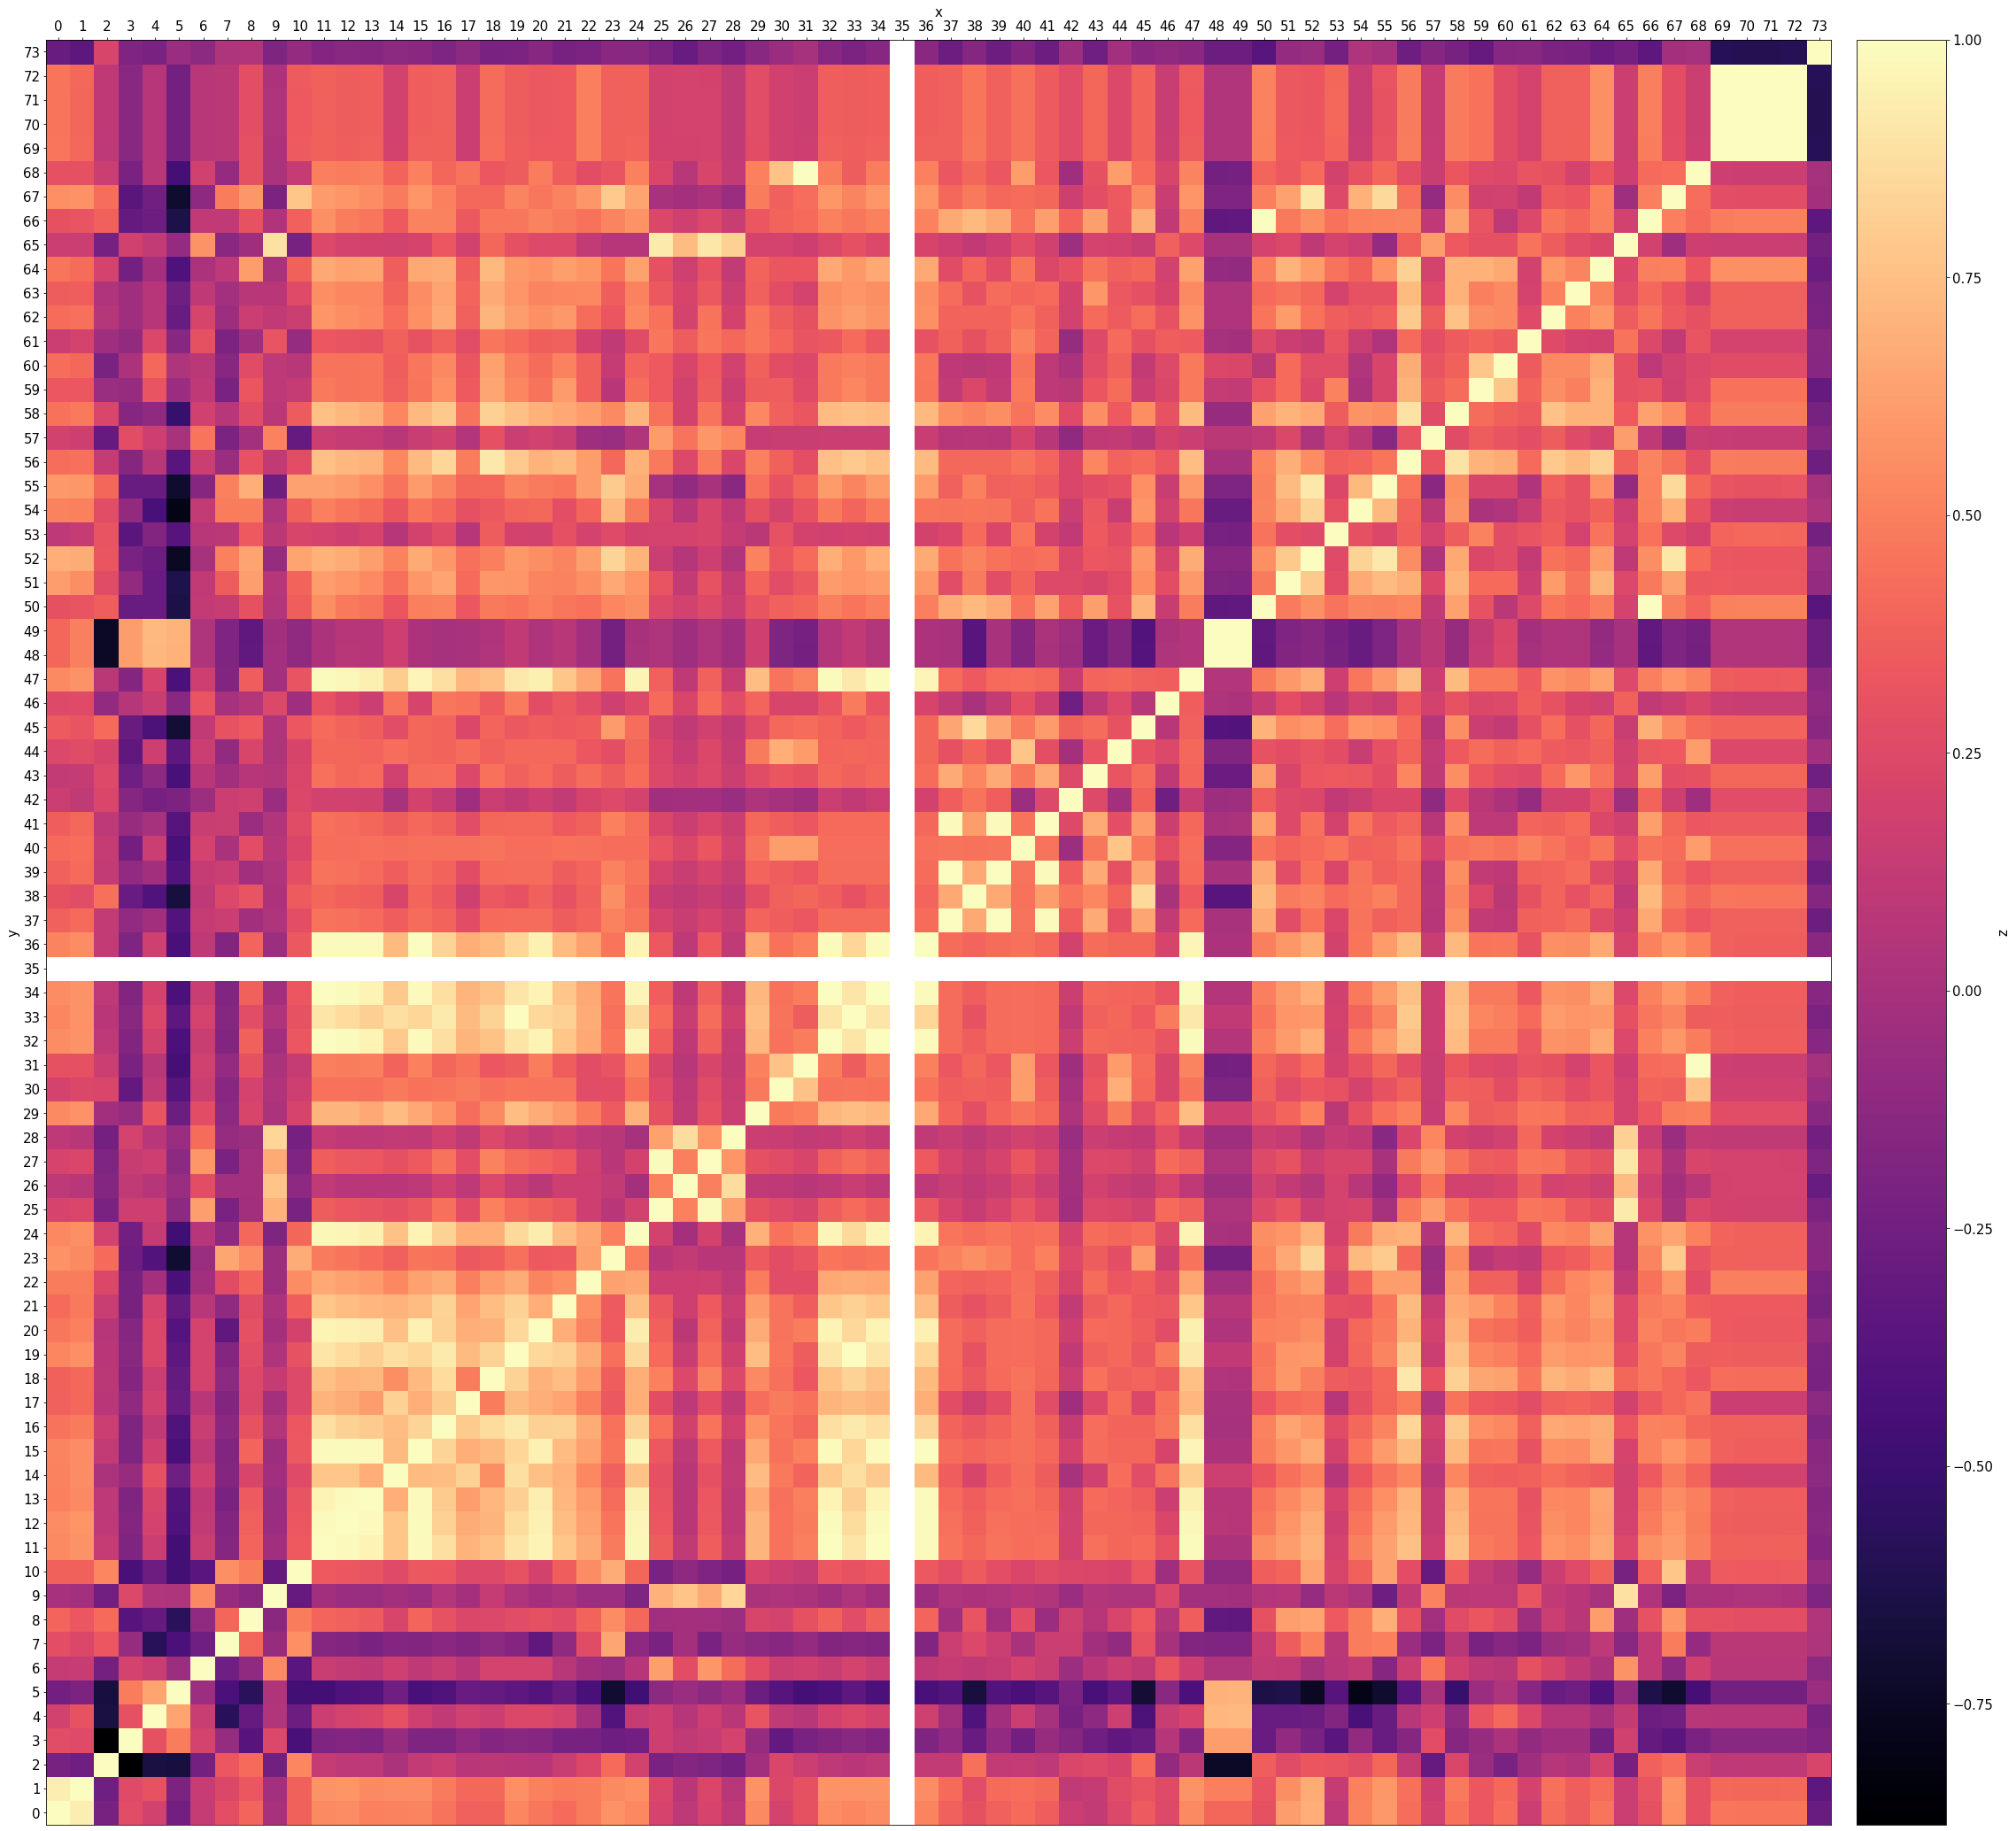

In [33]:
# holoviews tests
import itertools

import pandas
import hvplot.pandas
import holoviews.plotting.util
import holoviews
holoviews.extension('matplotlib')

df = pandas.read_csv('/mnt/DATA/Documenti/PhDMainLocalFolder/COGUTS/SoC_COGUTS_simulate_powereval/power_model/dataset/2perm_full.csv', index_col=[0, 1, 2, 3], header=[0, 1]).xs('features', drop_level=False, axis=0).T.astype('float64')

df = df.corr(method='spearman')

#img = holoviews.Image()

holoviews.HeatMap([(x, y, df.iloc[x, y]) for x, y in itertools.product(range(len(df.index)), range(len(df.columns)))]).opts(
    colorbar=True,
    xaxis='top', 
    # plot dimension in pixels, for non-matplotlib
    width=1500, height=1500,
    fontscale=1.5,
    show_values=False).opts(
    toolbar='disable',
    fig_size=1000,
    #fontsize={'title': 18, 'xticks': 8, 'yticks': 8},
    cmap=holoviews.plotting.util.process_cmap('Magma')
    )



In [1]:
import holoviews
holoviews.help(holoviews.HeatMap)

Parameters of 'HeatMap'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                        Value                     Type     Bounds   Mode 

cdims                   OrderedDict()                 Dict              V RW 
datatype   ['dataframe', 'dictionary', 'grid', '...   List   (0, None)  V RW 
extents            (None, None, None, None)          Tuple              V RW 
group                     'HeatMap'                  String             C RW 
kdims          [Dimension('x'), Dimension('y')]       List     (2, 2)   C RW 
label                         ''                     String             C RW 
vdims                  [Dimension('z')]               List   (0, None)  C RW 

Parameter docstrings:

cdims:    The constant dimensions defined as a dictionary of Dimension:value
          pairs providing additional dimension information about the object.
   